## Performance and Customer Insights

In [185]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
customers = pd.read_csv("C:/Users/hp/Downloads/Customers.csv")
products = pd.read_csv("C:/Users\hp/Downloads/Products.csv")
transactions = pd.read_csv("C:/Users/hp/Downloads/Transactions.csv")

In [187]:
customers

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15
...,...,...,...,...
195,C0196,Laura Watts,Europe,2022-06-07
196,C0197,Christina Harvey,Europe,2023-03-21
197,C0198,Rebecca Ray,Europe,2022-02-27
198,C0199,Andrea Jenkins,Europe,2022-12-03


In [189]:
products

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31
...,...,...,...,...
95,P096,SoundWave Headphones,Electronics,307.47
96,P097,BookWorld Cookbook,Books,319.34
97,P098,SoundWave Laptop,Electronics,299.93
98,P099,SoundWave Mystery Book,Books,354.29


In [191]:
transactions

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68
...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86


In [193]:
print("Customers Dataset:")
print(customers.head())

print("\nProducts Dataset:")
print(products.head())

print("\nTransactions Dataset:")
print(transactions.head())

Customers Dataset:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Products Dataset:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31

Transactions Dataset:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166   

In [195]:
# Check for missing values in each dataset
print("\nMissing values in Customers dataset:")
print(customers.isnull().sum())

print("\nMissing values in Products dataset:")
print(products.isnull().sum())

print("\nMissing values in Transactions dataset:")
print(transactions.isnull().sum())


Missing values in Customers dataset:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

Missing values in Products dataset:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

Missing values in Transactions dataset:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [197]:
# Convert date columns to datetime format
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'], errors='coerce')
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'], errors='coerce')

# Verify the changes
print("\nCustomers Dataset with converted dates:")
print(customers.head())

print("\nTransactions Dataset with converted dates:")
print(transactions.head())



Customers Dataset with converted dates:
  CustomerID        CustomerName         Region SignupDate
0      C0001    Lawrence Carroll  South America 2022-07-10
1      C0002      Elizabeth Lutz           Asia 2022-02-13
2      C0003      Michael Rivera  South America 2024-03-07
3      C0004  Kathleen Rodriguez  South America 2022-10-09
4      C0005         Laura Weber           Asia 2022-08-15

Transactions Dataset with converted dates:
  TransactionID CustomerID ProductID     TransactionDate  Quantity  \
0        T00001      C0199      P067 2024-08-25 12:38:23         1   
1        T00112      C0146      P067 2024-05-27 22:23:54         1   
2        T00166      C0127      P067 2024-04-25 07:38:55         1   
3        T00272      C0087      P067 2024-03-26 22:55:37         2   
4        T00363      C0070      P067 2024-03-21 15:10:10         3   

   TotalValue   Price  
0      300.68  300.68  
1      300.68  300.68  
2      300.68  300.68  
3      601.36  300.68  
4      902.04  300.6

In [199]:
# Check if all CustomerIDs in Transactions are in Customers
missing_customers = transactions[~transactions['CustomerID'].isin(customers['CustomerID'])]

# Check if all ProductIDs in Transactions are in Products
missing_products = transactions[~transactions['ProductID'].isin(products['ProductID'])]

print(f"\nMissing CustomerIDs: {len(missing_customers)}")
print(f"Missing ProductIDs: {len(missing_products)}")


Missing CustomerIDs: 0
Missing ProductIDs: 0


In [201]:
# Merge transactions with customers
transactions_customers = transactions.merge(customers, on="CustomerID", how="left")

# Merge the result with products
full_data = transactions_customers.merge(products, on="ProductID", how="left")

# Preview the merged data
print("\nMerged Dataset:")
print(full_data.head())


Merged Dataset:
  TransactionID CustomerID ProductID     TransactionDate  Quantity  \
0        T00001      C0199      P067 2024-08-25 12:38:23         1   
1        T00112      C0146      P067 2024-05-27 22:23:54         1   
2        T00166      C0127      P067 2024-04-25 07:38:55         1   
3        T00272      C0087      P067 2024-03-26 22:55:37         2   
4        T00363      C0070      P067 2024-03-21 15:10:10         3   

   TotalValue  Price_x     CustomerName         Region SignupDate  \
0      300.68   300.68   Andrea Jenkins         Europe 2022-12-03   
1      300.68   300.68  Brittany Harvey           Asia 2024-09-04   
2      300.68   300.68  Kathryn Stevens         Europe 2024-04-04   
3      601.36   300.68  Travis Campbell  South America 2024-04-11   
4      902.04   300.68    Timothy Perez         Europe 2022-03-15   

                       ProductName     Category  Price_y  
0  ComfortLiving Bluetooth Speaker  Electronics   300.68  
1  ComfortLiving Bluetooth Sp

## Exploratory Data Analysis (EDA)

1. Total Sales and Quantity by Region

In [213]:
# Group by region to find total sales and quantity
sales_by_region = full_data.groupby("Region")[["TotalValue", "Quantity"]].sum()

print("\nTotal Sales and Quantity by Region:")
print(sales_by_region)


Total Sales and Quantity by Region:
               TotalValue  Quantity
Region                             
Asia            152074.97       560
Europe          166254.63       595
North America   152313.40       593
South America   219352.56       789


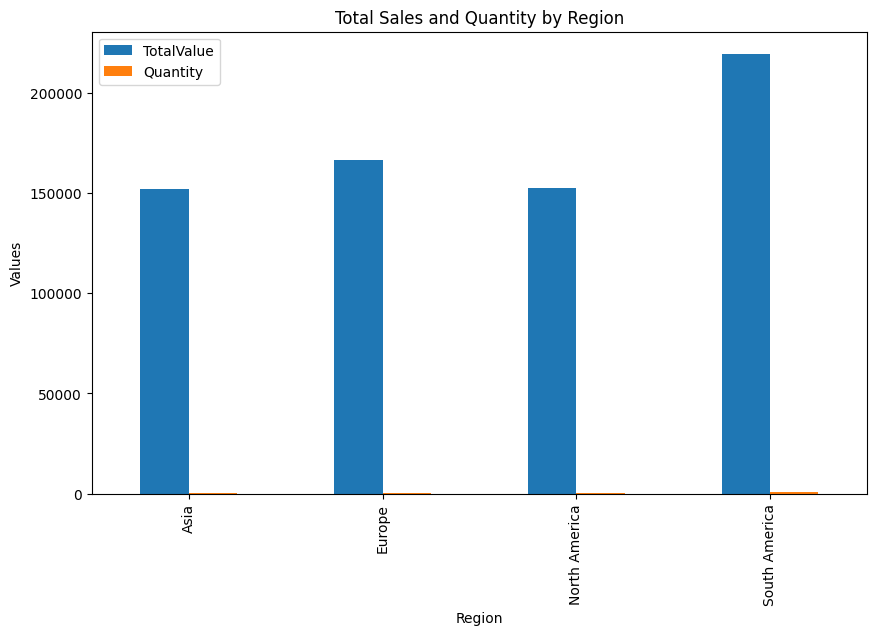

In [215]:
sales_by_region.plot(kind="bar", figsize=(10, 6), title="Total Sales and Quantity by Region")
plt.xlabel("Region")
plt.ylabel("Values")
plt.show()

- South America is the leader in sales ($219,352.56) and units sold as well (789).

- Sales in Europe $166,254.63 with 595 units, which means that the demand is still strong.

- Asia, with the lowest sales at $152,074.97 and quantity at 560, indicates an opportunity for growth based on better marketing and product fit.

- Tailored campaigns in underperforming regions can boost engagement and revenue.


2. Top Product Categories by Sales

In [219]:
# Group by category to find total sales
sales_by_category = full_data.groupby("Category")["TotalValue"].sum().sort_values(ascending=False)

print("\nSales by Product Category:")
print(sales_by_category)


Sales by Product Category:
Category
Books          192147.47
Electronics    180783.50
Clothing       166170.66
Home Decor     150893.93
Name: TotalValue, dtype: float64


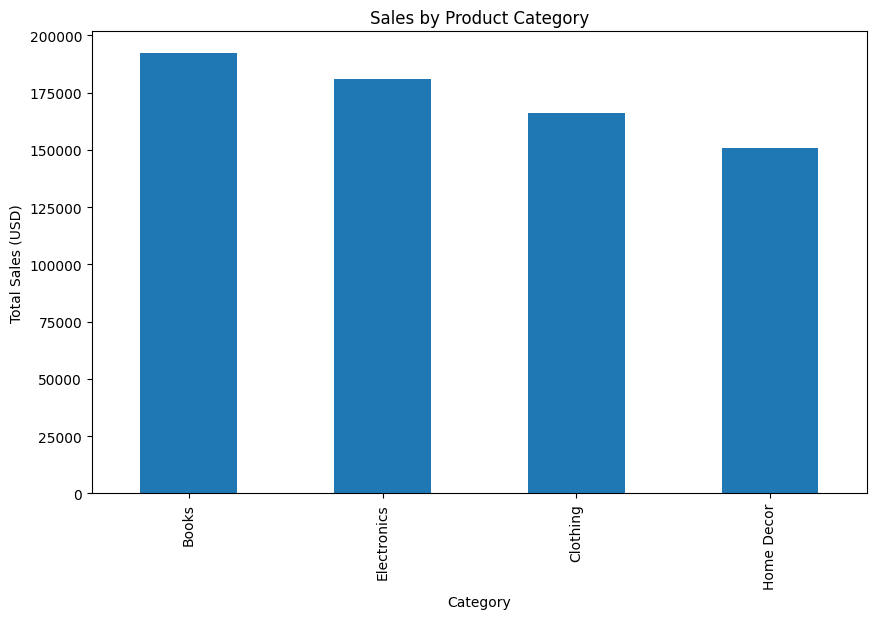

In [221]:
sales_by_category.plot(kind="bar", figsize=(10, 6), title="Sales by Product Category")
plt.xlabel("Category")
plt.ylabel("Total Sales (USD)")
plt.show()

- Books generate the highest revenue ($192,147.47), indicating strong customer interest.

- Electronics ($180,783.50) and Clothing ($166,170.66) show consistent performance across demographics.

- Home Decor ($150,893.93) is promising but needs focused promotions to unlock growth potential.

- Emphasizing top categories and introducing product bundles can increase sales further.

3. Most Purchased Products by Quantity

In [225]:
# Group by product name to find total quantity
top_products = full_data.groupby("ProductName")["Quantity"].sum().sort_values(ascending=False).head(5)

print("\nTop 5 Most Purchased Products:")
print(top_products)


Top 5 Most Purchased Products:
ProductName
ActiveWear Smartwatch    100
SoundWave Headphones      97
HomeSense Desk Lamp       81
ActiveWear Rug            79
SoundWave Cookbook        78
Name: Quantity, dtype: int64


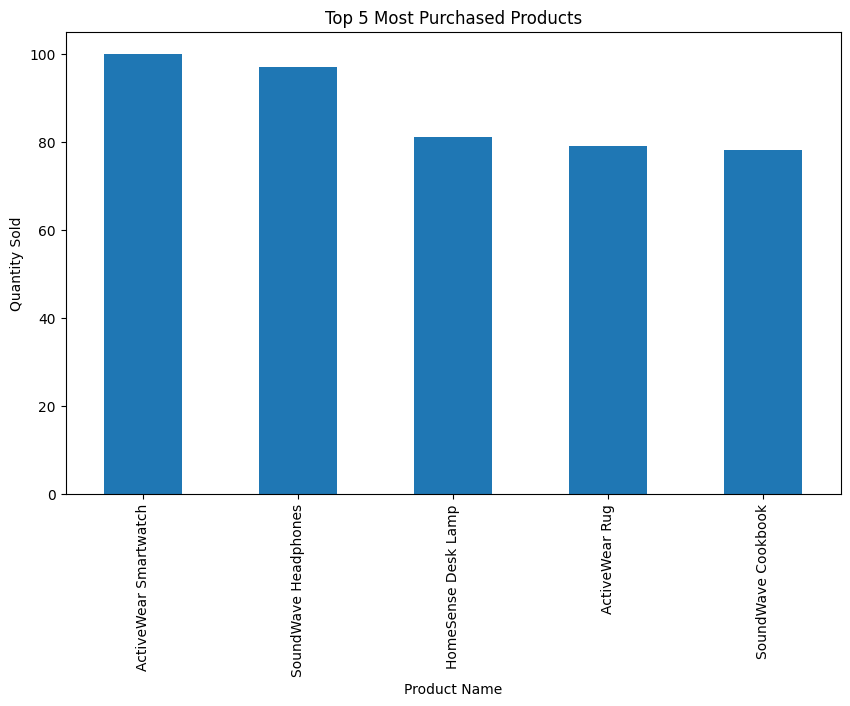

In [227]:
top_products.plot(kind="bar", figsize=(10, 6), title="Top 5 Most Purchased Products")
plt.xlabel("Product Name")
plt.ylabel("Quantity Sold")
plt.show()

- With 100 units sold, ActiveWear Smartwatch is still at the top of the list, which actually represents high demand.
- 
SoundWave Headphones and HomeSense Desk Lamp are also quite popular among 97 and 81 units respectively.
- 
Life-style items such as SoundWave Cookbook with 78 units reflect varied preferences of customers
- .
Cross-selling similar products and maintaining stock of best sellers can improve profits.

4. Customer Signup Trends Over Time

In [231]:
# Extract the year from SignupDate and count signups per year
signup_trends = customers['SignupDate'].dt.year.value_counts().sort_index()

print("\nCustomer Signup Trends Over the Years:")
print(signup_trends)


Customer Signup Trends Over the Years:
SignupDate
2022    64
2023    57
2024    79
Name: count, dtype: int64


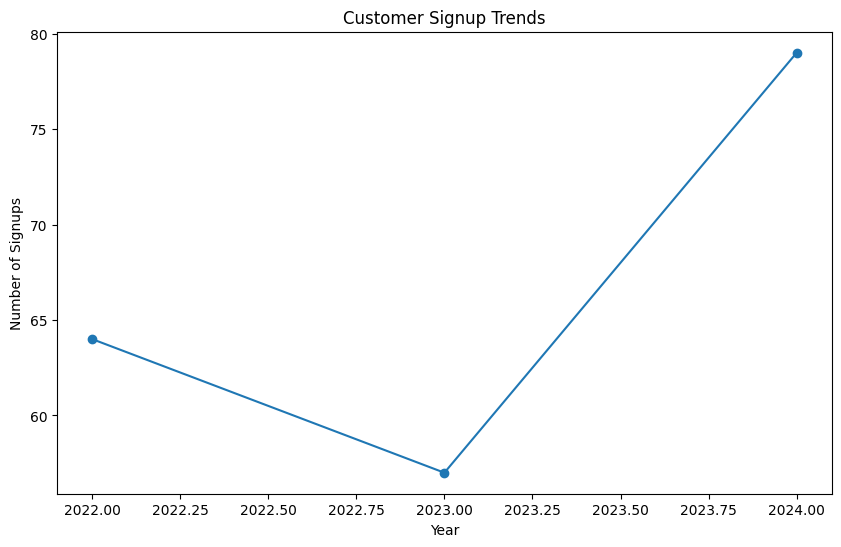

In [233]:
signup_trends.plot(kind="line", marker="o", figsize=(10, 6), title="Customer Signup Trends")
plt.xlabel("Year")
plt.ylabel("Number of Signups")
plt.show()

- 2024 had the highest signups (79), a 38.6% increase from 2023, reflecting effective acquisition efforts.

- Declines in 2023 (57 signups) indicate weaknesses in engagement or outreach strategies.

- Retargeting earlier signups (2022–2023) and replicating successful campaigns from 2024 can drive growth.

- Targeted campaigns in high signup periods will maintain momentum.

5. Average Transaction Value by Region

In [237]:
# Group by region to find average transaction value
avg_transaction_by_region = full_data.groupby("Region")["TotalValue"].mean()

print("\nAverage Transaction Value by Region:")
print(avg_transaction_by_region)


Average Transaction Value by Region:
Region
Asia             697.591606
Europe           710.489872
North America    624.235246
South America    721.554474
Name: TotalValue, dtype: float64


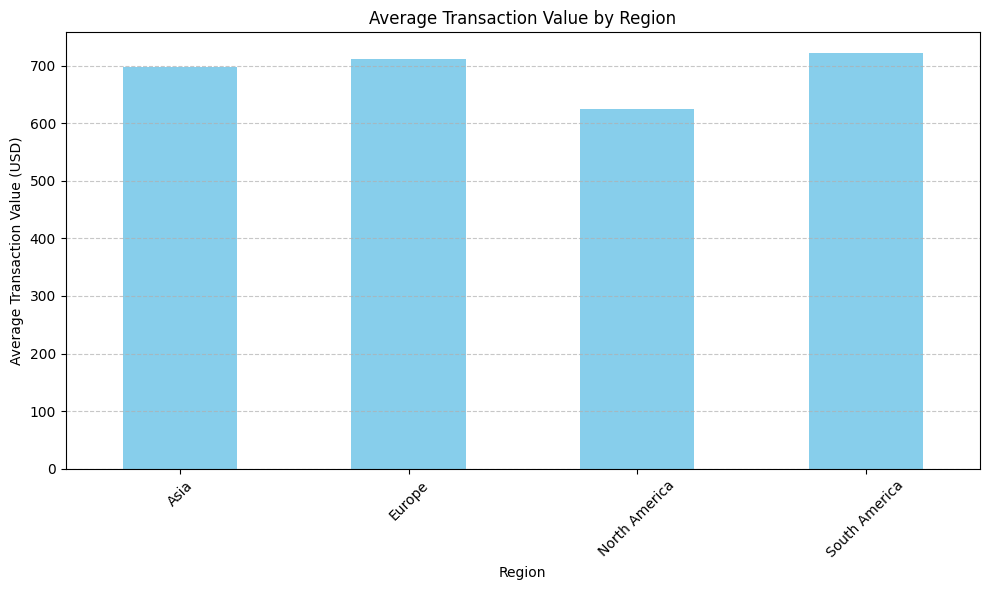

In [239]:
# Plot average transaction value by region
avg_transaction_by_region.plot(kind="bar", figsize=(10, 6), color="skyblue", title="Average Transaction Value by Region")

# Add labels and title
plt.xlabel("Region")
plt.ylabel("Average Transaction Value (USD)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

- South America has the highest average transaction value ($721.55), followed by Europe ($710.49).
- 
North America’s lower average ($624.24) indicates demand for lower-priced products.
- 
Custom pricing strategies and premium offerings can increase transaction value across regions
- .
Analyzing customer preferences in North America may open channels for new opportunities.

6. Seasonality of Transactions

In [243]:
# Extract month from TransactionDate
full_data['Month'] = full_data['TransactionDate'].dt.month

# Group by month to calculate total sales
monthly_sales = full_data.groupby("Month")["TotalValue"].sum()
print("\nMonthly Sales Trends:")
print(monthly_sales)


Monthly Sales Trends:
Month
1     66376.39
2     51459.27
3     47828.73
4     57519.06
5     64527.74
6     48771.18
7     71366.39
8     63436.74
9     70603.75
10    47063.22
11    38224.37
12    62818.72
Name: TotalValue, dtype: float64


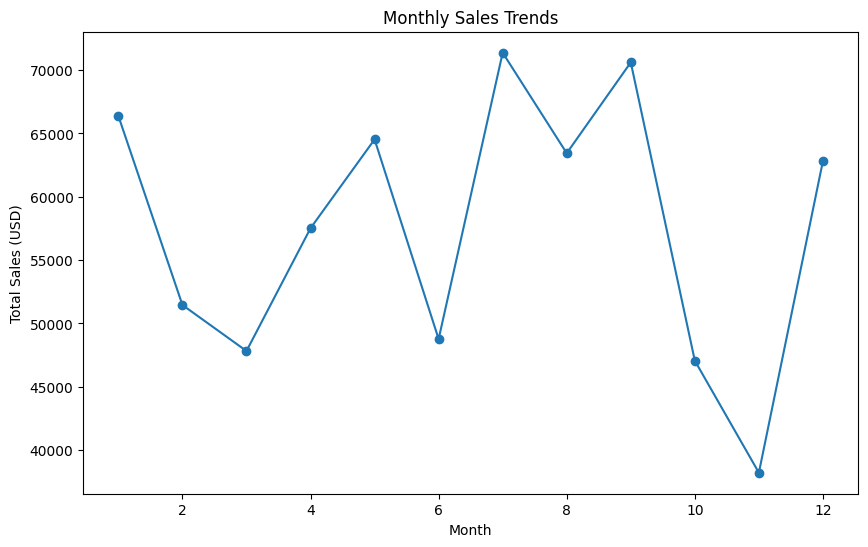

In [245]:
# Plot monthly sales trends
monthly_sales.plot(kind="line", marker="o", figsize=(10, 6), title="Monthly Sales Trends")
plt.xlabel("Month")
plt.ylabel("Total Sales (USD)")
plt.show()

- July records the highest sales ($71,366.39), suggesting peak seasonal demand.

- November sees the lowest sales ($38,224.37), signaling the need for improved promotions.

- Inventory and marketing can be aligned with seasonal peaks to maximize sales.

- Discounts or campaigns in November can boost low-performing months.

7. Lifetime Value of Customers

In [249]:
# Group by CustomerID to calculate total revenue per customer
customer_lifetime_value = full_data.groupby("CustomerID")["TotalValue"].sum().sort_values(ascending=False).head(10)

print("\nTop 10 Customers by Lifetime Value:")
print(customer_lifetime_value)


Top 10 Customers by Lifetime Value:
CustomerID
C0141    10673.87
C0054     8040.39
C0065     7663.70
C0156     7634.45
C0082     7572.91
C0188     7111.32
C0059     7073.28
C0028     6819.57
C0099     6715.72
C0165     6708.10
Name: TotalValue, dtype: float64


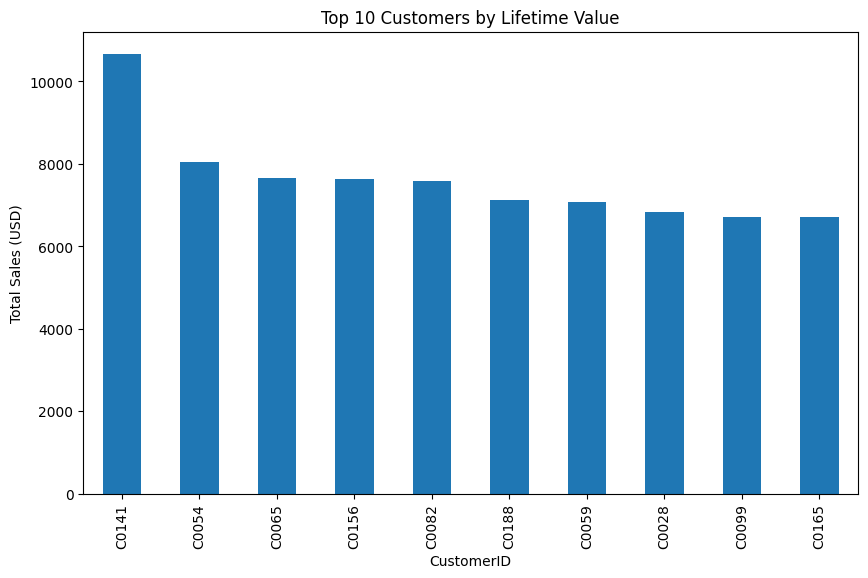

In [251]:
# Visualize the top customers
customer_lifetime_value.plot(kind="bar", figsize=(10, 6), title="Top 10 Customers by Lifetime Value")
plt.xlabel("CustomerID")
plt.ylabel("Total Sales (USD)")
plt.show()

- Customer C0141 has the highest lifetime value of $10,673.87 and is important.

- The average lifetime value of the top 10 customers is $7,735.33.

- Personalized loyalty programs, especially for high-value customers, can improve retention and revenue.

- Identifying and nurturing emerging high-value customers can improve long-term growth.

8. Customer Segmentation by Region

In [255]:
# Group by region to calculate customer counts and total sales
region_segmentation = full_data.groupby("Region").agg({"CustomerID": "nunique", "TotalValue": "sum"}).rename(columns={"CustomerID": "CustomerCount"})

print("\nCustomer Segmentation by Region:")
print(region_segmentation)


Customer Segmentation by Region:
               CustomerCount  TotalValue
Region                                  
Asia                      44   152074.97
Europe                    50   166254.63
North America             46   152313.40
South America             59   219352.56


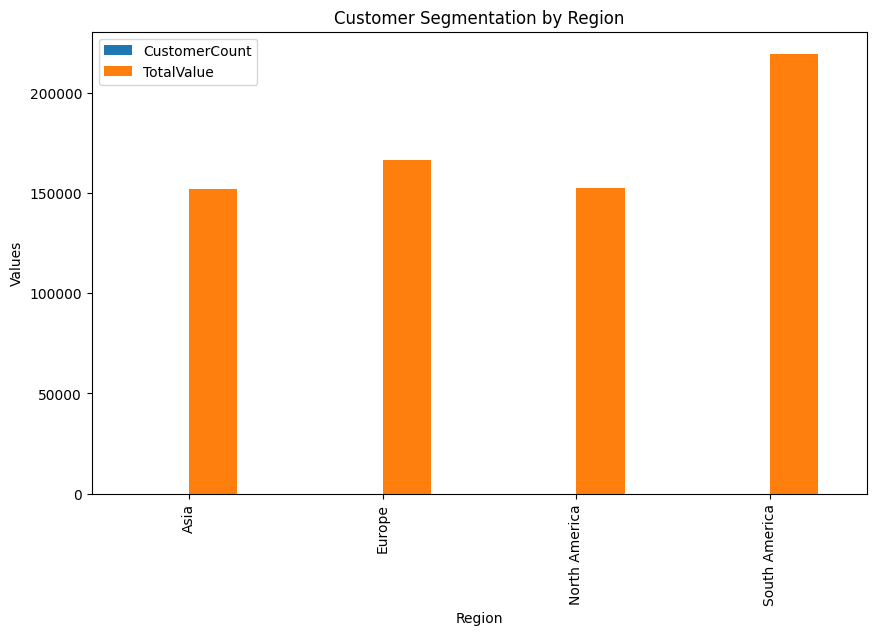

In [257]:
# Visualize region segmentation
region_segmentation.plot(kind="bar", figsize=(10, 6), title="Customer Segmentation by Region")
plt.xlabel("Region")
plt.ylabel("Values")
plt.show()

- South America has the highest number of customers (59) and sales of $219,352.56.

- Asia has the least number of customers at 44, which leaves room for growth.

- Sales can be increased by strengthening customer acquisition and engagement strategies in Asia.

- Tailored offers for South America can continue its good performance.

9. Correlation Analysis

In [261]:
# Select numerical columns for correlation analysis
correlation_data = full_data[["Quantity", "TotalValue", "Price_x"]]

# Compute the correlation matrix
correlation_matrix = correlation_data.corr()

print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
            Quantity  TotalValue   Price_x
Quantity    1.000000    0.609972 -0.009378
TotalValue  0.609972    1.000000  0.722714
Price_x    -0.009378    0.722714  1.000000


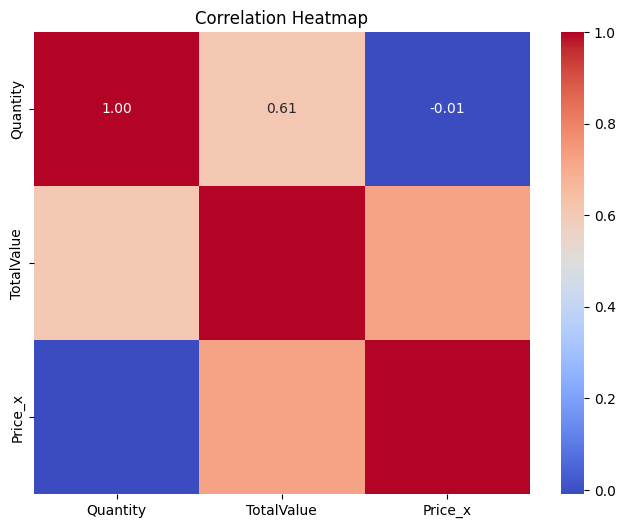

In [263]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

- Quantity and TotalValue are positively correlated (0.61), showing that higher sales volumes drive revenue.

- Price_x and TotalValue have a strong correlation (0.72), indicating pricing impacts revenue significantly.

- Price_x and Quantity have a weak correlation (-0.01), suggesting pricing doesn’t affect volume as much.

- Balancing pricing and volume strategies is crucial for maximizing profitability.